### Zu installieren:
* Python (Version 3.7)
* Numpy
* Matplotlib
* Pillow

### Bilder laden
Es existieren mehrere Möglichkeiten Bilder in python zu laden. Eine davon ist über Pillow. Der Befehl **convert('L')** lädt das Bild als Grauwertbild. 

In [2]:
from PIL import Image
img = Image.open('baer.jpeg').convert('L')

### Bilder anzeigen
Mittels matplotlib können Bilder auch angezeigt werden. Mittels **imshow()** werden die eingegebenen Daten als Bild angezeigt. Mit **show()** können dann die geladenen figures ausgegeben werden.

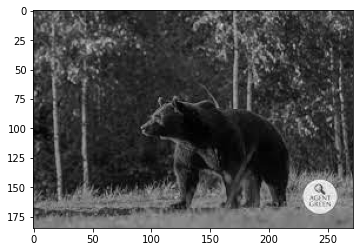

In [13]:
import matplotlib.pyplot as plt
plt.imshow(img, cmap='gray')
#plt.show()
plt.savefig("./neuesbild.jpg")

### Convertieren des Bildes in ein Numpy Array
NumPy ist eine Bibliothek für eine einfache Handhabung von Vektoren, Matrizen etc.. Im folgenden Schritt transformieren wir das mit Pillow geladene Bild in ein NumPy array um.

In [14]:
import numpy as np

img_np = np.asarray(img)

### Bildinformationen ausgeben
Informationen über den Datentyp und die Dimensionen des NumPy Arrays können mit folgenden Befehlen ausgegeben werden.

In [15]:
print('Datentyp: ' + str(img_np.dtype))
print('Dimensionen: ' + str(img_np.shape))



Datentyp: uint8
Dimensionen: (185, 272)


### Wie sieht das Bild aus?
Das geladene Bild ist eine Höhe x Weite x Channel großes Array. In diesem Fall ist das geladene Bild ein Grauwertbild und somit die Anzahl der Channel = 1. Jeder Eintrag des Arrays / Bildes besteht aus einem Wert zwischen 0 und 255. Der Wert 0 an einer Stelle bedeutet im Bild einen schwarzen Pixel, der Wert 255 einen weißen. Alle Werte zwischen 0 und 255 bezeichnen Grauwertabstufungen.

In [16]:
img_np

array([[ 93,  84,  70, ...,  53,  45,  34],
       [ 85,  77,  66, ...,  54,  67,  66],
       [ 89,  81,  64, ...,  57,  70,  62],
       ...,
       [121, 124, 124, ..., 124, 121, 119],
       [122, 129, 127, ..., 125, 121, 118],
       [117, 120, 124, ..., 124, 121, 118]], dtype=uint8)

Um nicht auf die 256 Integer-Werte limitiert zu sein, skalieren wir für die Anwendung mathematischer Operationen das Bild auf die Werte zwischen 0 und 1. Hierzu ändern wir den Datentyp zu Float.

In [7]:
img_np = img_np.astype(np.float64) / 255
print('Maximum: ' + str(np.max(img_np)))
print('Minimum: ' + str(np.min(img_np)))
img_np

Maximum: 0.9725490196078431
Minimum: 0.00392156862745098


array([[0.36470588, 0.32941176, 0.2745098 , ..., 0.20784314, 0.17647059,
        0.13333333],
       [0.33333333, 0.30196078, 0.25882353, ..., 0.21176471, 0.2627451 ,
        0.25882353],
       [0.34901961, 0.31764706, 0.25098039, ..., 0.22352941, 0.2745098 ,
        0.24313725],
       ...,
       [0.4745098 , 0.48627451, 0.48627451, ..., 0.48627451, 0.4745098 ,
        0.46666667],
       [0.47843137, 0.50588235, 0.49803922, ..., 0.49019608, 0.4745098 ,
        0.4627451 ],
       [0.45882353, 0.47058824, 0.48627451, ..., 0.48627451, 0.4745098 ,
        0.4627451 ]])

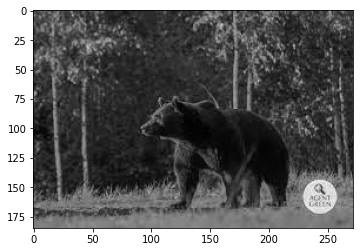

In [8]:
plt.imshow(img_np, cmap='gray', vmin=0, vmax=1)
plt.show()

### Operationen auf dem Bild

Auf dem Bild können nun verschiedenste Operationen angewandt werden. Möchte man nur einen Teilausschnittes des Bildes anzeigen bzw nur auf einem Teilausschnitt arbeiten, kann dies mittels der Angabe entsprechender Indizes im Bild getan werden.

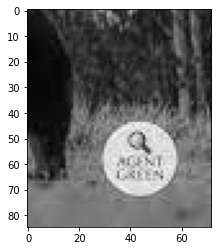

In [9]:
img_np_crop = img_np[100:300,200:550]
plt.imshow(img_np_crop, cmap='gray', vmin=0, vmax=1)
plt.show()

Im folgenden werden die Grauwerte des Bildes bearbeitet. Mittels der Multiplikation aller Pixelwerte mit 0.5 werden die Einträge des Bildes verkleinert und somit das Bild verdunkelt.

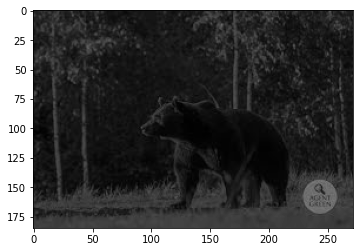

In [10]:
img_np_dark = img_np * 0.5
plt.imshow(img_np_dark, cmap='gray', vmin=0, vmax=1)
plt.show()

In Laufe dieses Kurses wird die Maskierung eines Bildes interessant. Dabei wird ein Bild mit einer schwarz-weiß Maske punktweise multipliziert. Die Pixel, welche un der selben Stelle liegen, wie die 0-Einträge der Maske werden durch die Multiplikation auf 0 gesetzt. Die restlichen Einträge an der Stelle der 1-Einträge der Maske behalten ihren Wert.

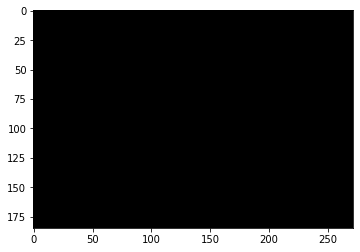

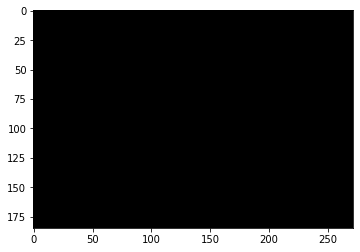

In [11]:
mask = np.zeros_like(img_np)
mask[100:200,400:500] = 1
plt.imshow(mask, cmap='gray', vmin=0, vmax=1)
plt.show()

masked_img = img_np * mask
plt.imshow(masked_img, cmap='gray', vmin=0, vmax=1)
plt.show()

### Laden eines Farbbildes
Ein RGB-Farbbild ist ein drei dimensionaler Tensor. Die ersten zwei Dimensionen beschreiben die Raumdimensionen. Die dritte besteht aus den drei Farbwerten: Rot, Grün, Blau.

Dimensions: (185, 272, 3)


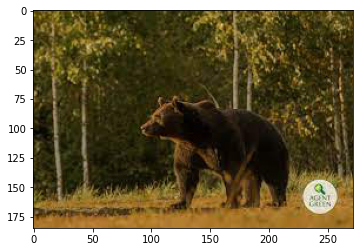

In [17]:
img_col = Image.open('baer.jpeg')
img_col_np = np.asarray(img_col, dtype=np.float64)/255
print('Dimensions: ' +  str(img_col_np.shape))
plt.imshow(img_col_np)
plt.show()

Es ist auch möglich auf die einzelnen Farbdimensionen einzeln zuzugreifen und diese zu bearbeiten:

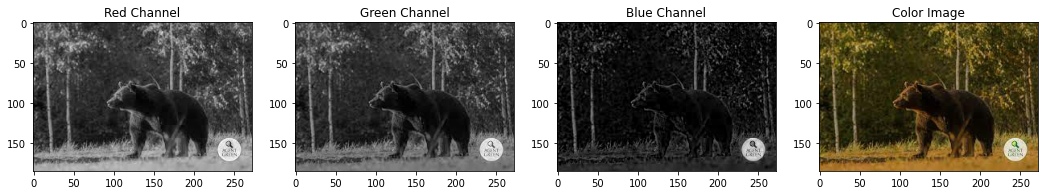

In [18]:
img_col_np_red = img_col_np[:,:,0]
img_col_np_green = img_col_np[:,:,1]
img_col_np_blue = img_col_np[:,:,2]

# Subplots zur schöneres Anzeige (Anzahl Bilder Höhe, Anzahl Bilder Breite, Aktuelles Bild)
f = plt.figure(figsize=(18,10))
plt.subplot(1, 4, 1)
plt.imshow(img_col_np_red, cmap='gray', vmin=0, vmax=1)
plt.title('Red Channel')
plt.subplot(1, 4, 2)
plt.imshow(img_col_np_green, cmap='gray', vmin=0, vmax=1)
plt.title('Green Channel')
plt.subplot(1, 4, 3)
plt.imshow(img_col_np_blue, cmap='gray', vmin=0, vmax=1)
plt.title('Blue Channel')
plt.subplot(1, 4, 4)
plt.imshow(img_col_np, vmin=0, vmax=1)
plt.title('Color Image')
plt.show()

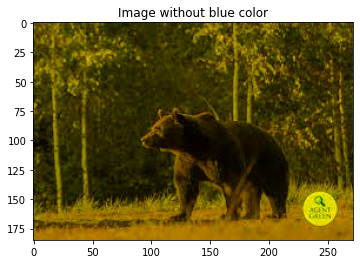

In [19]:
# Set blue channel to zero
img_col_noblue = img_col_np.copy()
img_col_noblue[:,:,2] = 0
plt.imshow(img_col_noblue)
plt.title('Image without blue color')
plt.show()

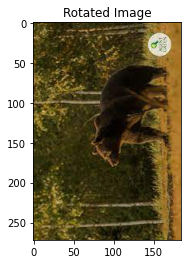

In [20]:
# Rotate Image
rotated=  np.rot90(img_col_np)
plt.imshow(rotated)
plt.title('Rotated Image')
plt.show()